<a href="https://colab.research.google.com/github/dickymuhr/Visualization-IMDb-Indonesian-Movies/blob/main/visualization_imdb_indonesian_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Dicky Muhammad Rizal
 # 19/440306/TK/48633

# Importing dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-indonesian-movies/indonesian_movies.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/kaggle/input/imdb-indonesian-movies/indonesian_movies.csv')

In [ ]:
df.shape

(1272, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


# Get only films after 2000

In [ ]:
df = df[df['year']>=2000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1018 non-null   object 
 1   year          1018 non-null   int64  
 2   description   736 non-null    object 
 3   genre         1006 non-null   object 
 4   rating        357 non-null    object 
 5   users_rating  1018 non-null   float64
 6   votes         1018 non-null   object 
 7   languages     1018 non-null   object 
 8   directors     1015 non-null   object 
 9   actors        1018 non-null   object 
 10  runtime       734 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 95.4+ KB


In [ ]:
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


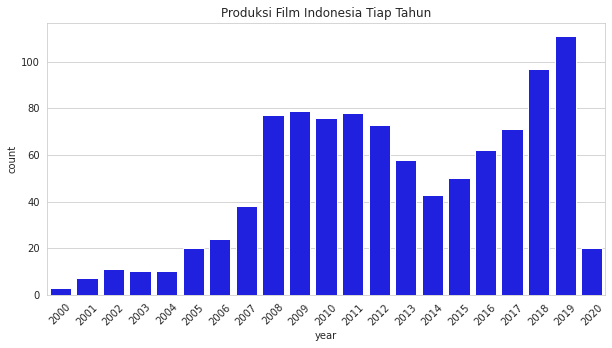

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x='year',data=df,color='b',ax=ax)
plt.title("Produksi Film Indonesia Tiap Tahun")
plt.xticks(rotation=45)
plt.savefig("produksi film tiap tahun.png")
plt.show()

# Users Rating

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


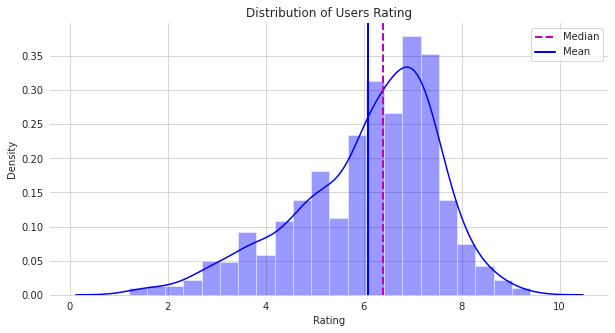

The average rating of Indonesian Movies is 6.08
The median rating of Indonesian Movies is 6.40


In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(x=df['users_rating'],color='b',ax=ax)
sns.despine(left=True)
    
ax.axvline(x=df['users_rating'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df['users_rating'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)
ax.set(xlabel='Rating',title="Distribution of Users Rating")

ax.legend()
plt.savefig("distribusi rating.png")
plt.show()
print("The average rating of Indonesian Movies is {:.2f}".format(df['users_rating'].mean()))
print("The median rating of Indonesian Movies is {:.2f}".format(df['users_rating'].median()))

In [ ]:
print("Rating maksimal {} dan minimum {}".format(df['users_rating'].max(),df['users_rating'].min()))

Rating maksimal 9.4 dan minimum 1.2


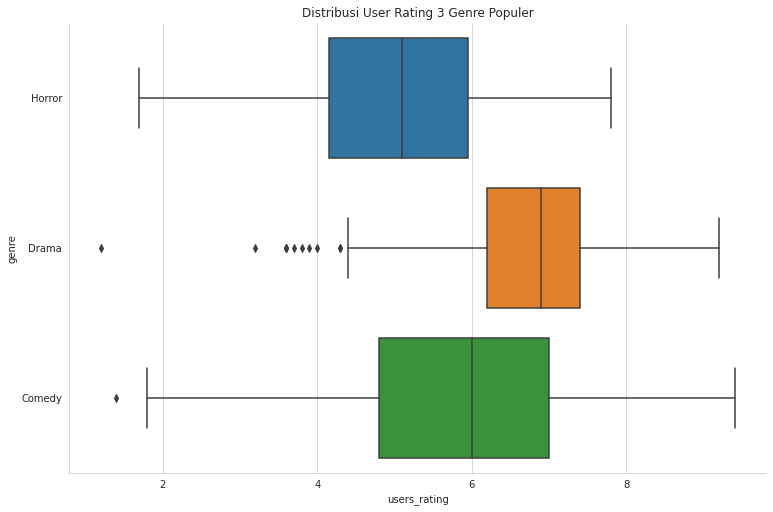

In [ ]:
g = sns.catplot(x="users_rating",y="genre",data=df,kind="box",order=['Horror','Drama','Comedy'])
g.fig.set_size_inches(12,7)
g.set(title="Distribusi User Rating 3 Genre Populer")
plt.savefig("distribusi rating genre.png")
plt.show()

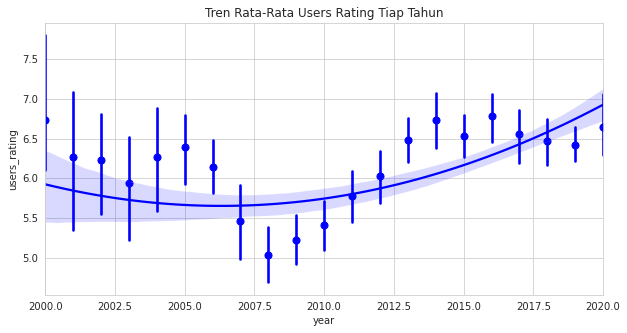

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.regplot(x='year',y='users_rating',data=df,order=2,color='b',x_estimator=np.mean,ax=ax)
plt.title("Tren Rata-Rata Users Rating Tiap Tahun")
plt.savefig("tren user rating.png")
plt.show()

# Genre

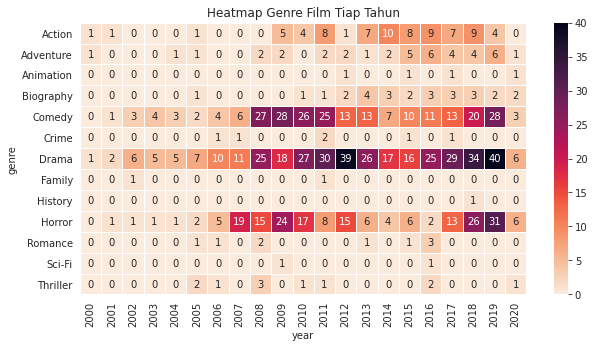

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
df_crosstab = pd.crosstab(df["genre"],df["year"])
sns.heatmap(df_crosstab,annot=True,linewidths=1,fmt='d',ax=ax,cmap = sns.cm.rocket_r)
ax.set(title='Heatmap Genre Film Tiap Tahun')
plt.savefig("heatmap genre film.png")
plt.show()

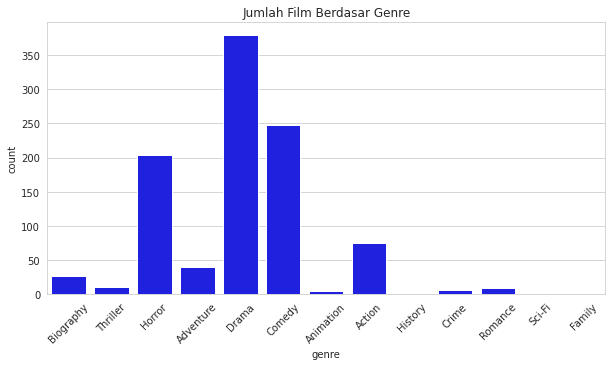

In [ ]:
#df.groupby('genre')['genre'].count()
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='genre',color='b',ax=ax)
ax.set(title='Jumlah Film Berdasar Genre')
plt.xticks(rotation=45)
plt.show()

# Aktor - Sutradara

In [ ]:
#Cleaning data actors column and make new dataframe to store actors appereance data
df['actors'] = df['actors'].str.replace(r'[\[\]\'\"]','')
df['actors'] = df['actors'].str.replace(', ',',')

dict_actor = {}
for actors in df['actors'].values:
    actors = list(actors.split(","))
    for actor in actors:
        if actor in dict_actor.keys():
            dict_actor[actor] = dict_actor[actor] + 1
        else:
            dict_actor[actor] = 1

df_actor = pd.DataFrame.from_dict(dict_actor,orient='index',columns=['Film'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
top_actor = df_actor.sort_values(by='Film',ascending=False)[1:6]
top_actor

,Film
Lukman Sardi,57
Reza Rahadian,47
Verdi Solaiman,45
Jajang C. Noer,41
Tio Pakusadewo,38


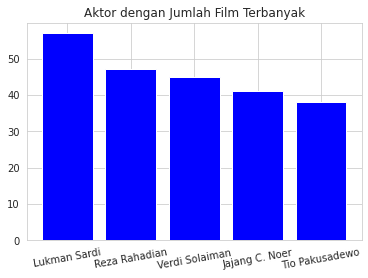

In [ ]:
fig, ax = plt.subplots()
ax.bar(top_actor.index, top_actor["Film"],color='b')
plt.xticks(rotation=10)
plt.title("Aktor dengan Jumlah Film Terbanyak")
plt.savefig("aktor.png")
plt.show()

In [ ]:
top_director = df['directors'].value_counts()[0:5]
top_director

Nayato Fio Nuala    61
Rizal Mantovani     34
Hanung Bramantyo    31
Monty Tiwa          23
Jose Poernomo       21
Name: directors, dtype: int64

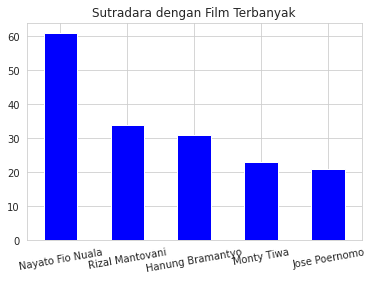

In [ ]:
top_director.plot.bar(color='b')
plt.xticks(rotation=10)
plt.title("Sutradara dengan Film Terbanyak")
plt.savefig("sutradara.png")
plt.show()

In [ ]:
experienced_dir = df['directors'].value_counts() >= 10 #have directed equal or more than 10 films
print(experienced_dir)

Nayato Fio Nuala      True
Rizal Mantovani       True
Hanung Bramantyo      True
Monty Tiwa            True
Jose Poernomo         True
                     ...  
Anto Lupus           False
Raditya Sidharta     False
Witra Asliga         False
Adhe Dharmastriya    False
Rusmin Nuryadin      False
Name: directors, Length: 304, dtype: bool


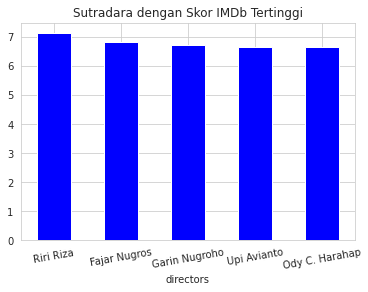

In [ ]:
top_rated_director = df.groupby('directors')['users_rating'].mean()
top_rated_director[experienced_dir].sort_values(ascending=False)[0:5].plot.bar(color='b')
plt.xticks(rotation=10)
plt.title("Sutradara dengan Skor IMDb Tertinggi")
plt.savefig("skor sutradara.png")
plt.show()